In [1]:
import pandas as pd

df = pd.read_csv('startup_data.csv')

# first 5 series 
df.head()

# last 5 series
df.tail()

# Trim whitespace from column names
df.columns = df.columns.str.strip()
df.columns

Index(['EmployeeID', 'FirstName', 'LastName', 'Role', 'Department', 'Salary',
       'StartDate', 'Project', 'PerformanceRating', 'Age', 'Education',
       'YearsOfExperience', 'Bonuses', 'WorkHoursPerWeek', 'VacationDaysTaken',
       'TrainingHours', 'TeamSize', 'ClientSatisfactionScore'],
      dtype='object')

In [24]:
# General information about the DataFrame
# df.info()

# General information about count, mean, std, min, max, percentiles
# df.describe()

df['Department'].unique()

array([' Development      ', ' Data Science     ', ' Design           ',
       ' Management       ', ' Quality Assurance', ' Operations       ',
       ' Human Resources  ', ' Marketing        ', ' Documentation    ',
       ' Sales            ', ' Customer Service ', ' Finance          ',
       ' IT               '], dtype=object)

In [25]:
# The mean of average salary by role
avg_salary_by_role = df.groupby('Role')['Salary'].mean().sort_values(ascending=False)
avg_salary_by_role

Role
Software Architect               84000.0
Technical Lead                   82000.0
Product Manager                  80500.0
Technical Project Manager        80000.0
Cloud Architect                  80000.0
                                  ...   
Technical Writer                 65500.0
QA Engineer                      65000.0
Technical Support Specialist     65000.0
Content Writer                   64000.0
Customer Support                 62000.0
Name: Salary, Length: 63, dtype: float64

In [26]:
# The distribution of performance rating
performance_distribution = df['PerformanceRating'].value_counts().sort_values(ascending=True)
performance_distribution

PerformanceRating
4.0     2
4.9     5
4.1     9
4.8     9
4.4    11
4.7    12
4.2    12
4.5    13
4.6    13
4.3    14
Name: count, dtype: int64

In [27]:
# The distribution of departments
department_distribution = df['Department'].value_counts()
department_distribution

Department
Development          24
Data Science         15
Design               15
Operations           12
Management           10
Marketing             7
Quality Assurance     4
IT                    4
Human Resources       3
Documentation         2
Customer Service      2
Sales                 1
Finance               1
Name: count, dtype: int64

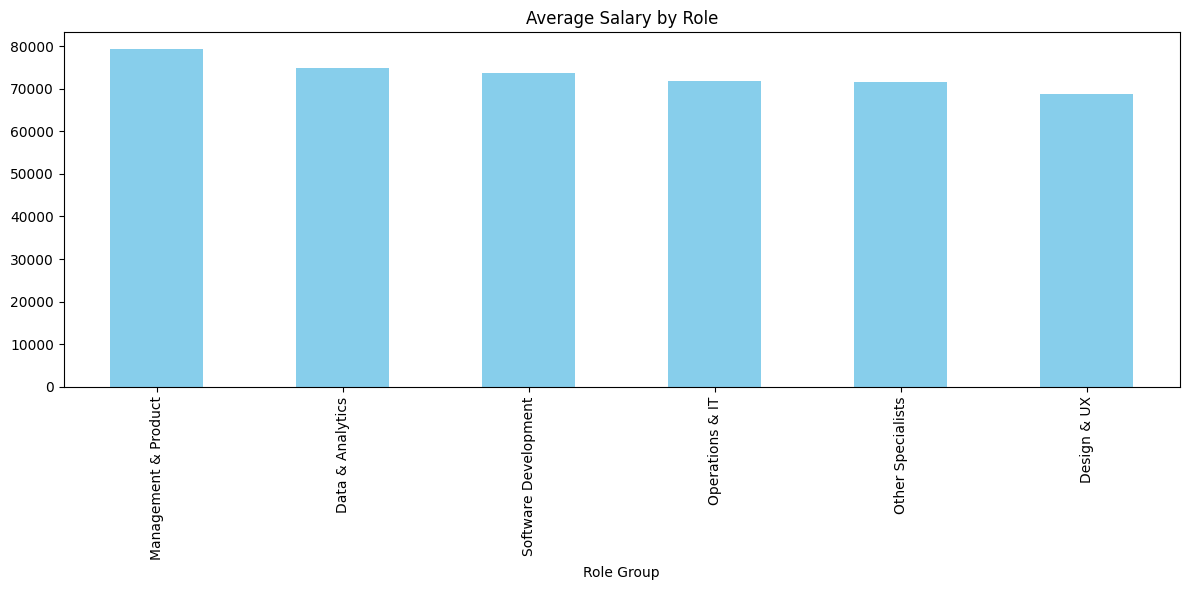

In [28]:
import matplotlib.pyplot as plt

# Group roles 
role_groups = {
    'Software Development': ['Software Engineer', 'Backend Developer', 'Frontend Developer', 'Full Stack Developer', 'Mobile Developer', 'Software Architect'],
    'Data & Analytics': ['Data Scientist', 'Data Analyst', 'Data Engineer', 'Machine Learning Engineer', 'Business Intelligence Analyst'],
    'Design & UX': ['UX Designer', 'UI Designer', 'Graphic Designer', 'Product Designer'],
    'Management & Product': ['Product Manager', 'Project Manager', 'Technical Lead', 'Scrum Master', 'Agile Coach'],
    'Operations & IT': ['DevOps Engineer', 'System Administrator', 'Network Engineer', 'Cloud Engineer', 'IT Support Specialist'],
    'Other Specialists': ['Marketing Specialist', 'HR Specialist', 'Financial Analyst', 'Sales Manager', 'Customer Support']
}

# Determine group to each role 
def group_roles(role):
    for group, roles in role_groups.items():
        if any(r.lower() in role.lower() for r in roles):
            return group
    return 'Other Specialists'

# The mean of salaries by role group
df['Role Group'] = df['Role'].apply(group_roles)
avg_salary_by_role_group = df.groupby('Role Group')['Salary'].mean().sort_values(ascending=False)

# Plot bar chart for role and role group means
plt.figure(figsize=(12,6))
# avg_salary_by_role.plot(kind='bar', color='skyblue')
avg_salary_by_role_group.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Role')
# plt.xlabel('Role', fontsize=12)
# plt.ylabel('Average Salary', fontsize=12)
plt.tight_layout()
plt.show()

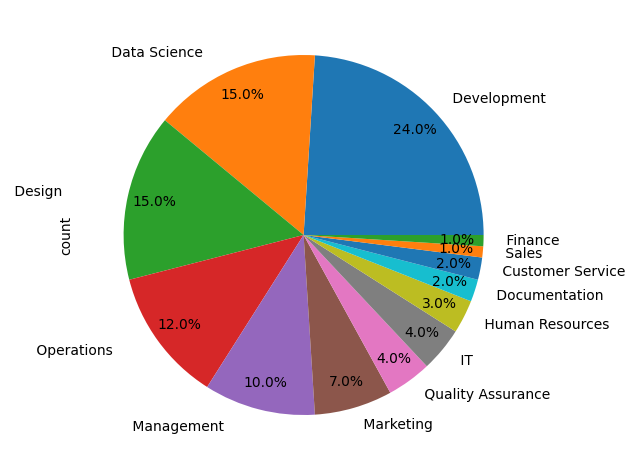

In [29]:
# Plot pie chart for distribution of departments
department_distribution.plot(kind='pie', autopct='%1.1f%%', pctdistance=0.85)
plt.tight_layout()
plt.show()

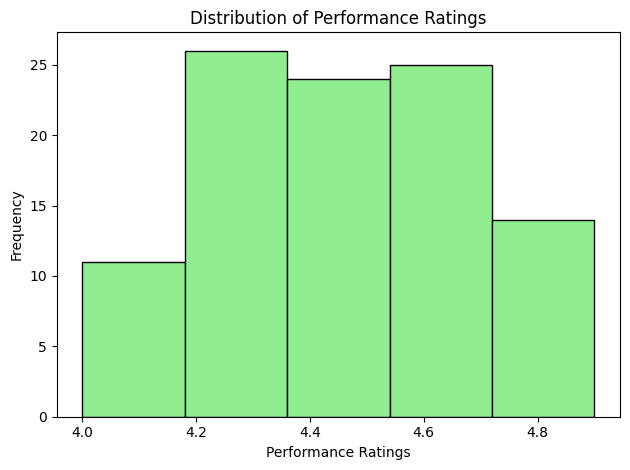

In [30]:
# Plot historgram chart for performance ratings
plt.hist(df['PerformanceRating'], bins=5, edgecolor='black', color='lightgreen'
# , x='Performance Ratings', y='Frequency'
)
plt.title('Distribution of Performance Ratings')
plt.xlabel('Performance Ratings')
plt.ylabel('Frequency')
plt.tight_layout()

plt.show()

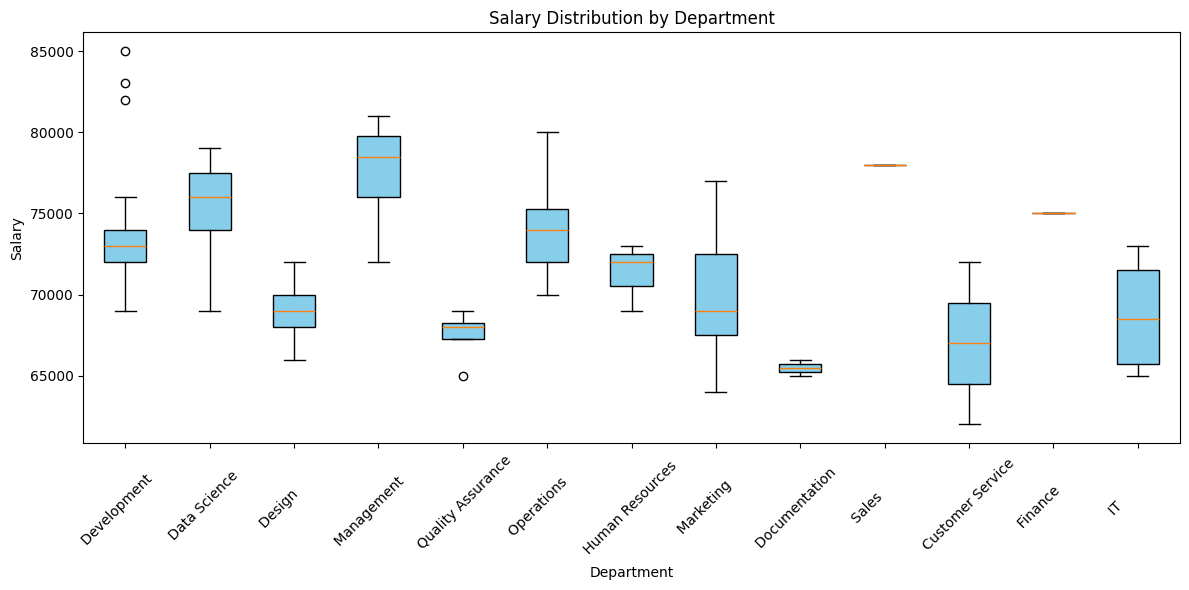

In [31]:
plt.figure(figsize=(12,6))
departments = df['Department'].unique()
data = [df[df['Department'] == dept]['Salary'] for dept in departments]

plt.boxplot(data,tick_labels=departments, patch_artist=True, boxprops=dict(facecolor='skyblue') )
# Set the title and labels
plt.title('Salary Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Salary')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the layout to fit the plot elements
plt.tight_layout()

# Display the plot
plt.show()

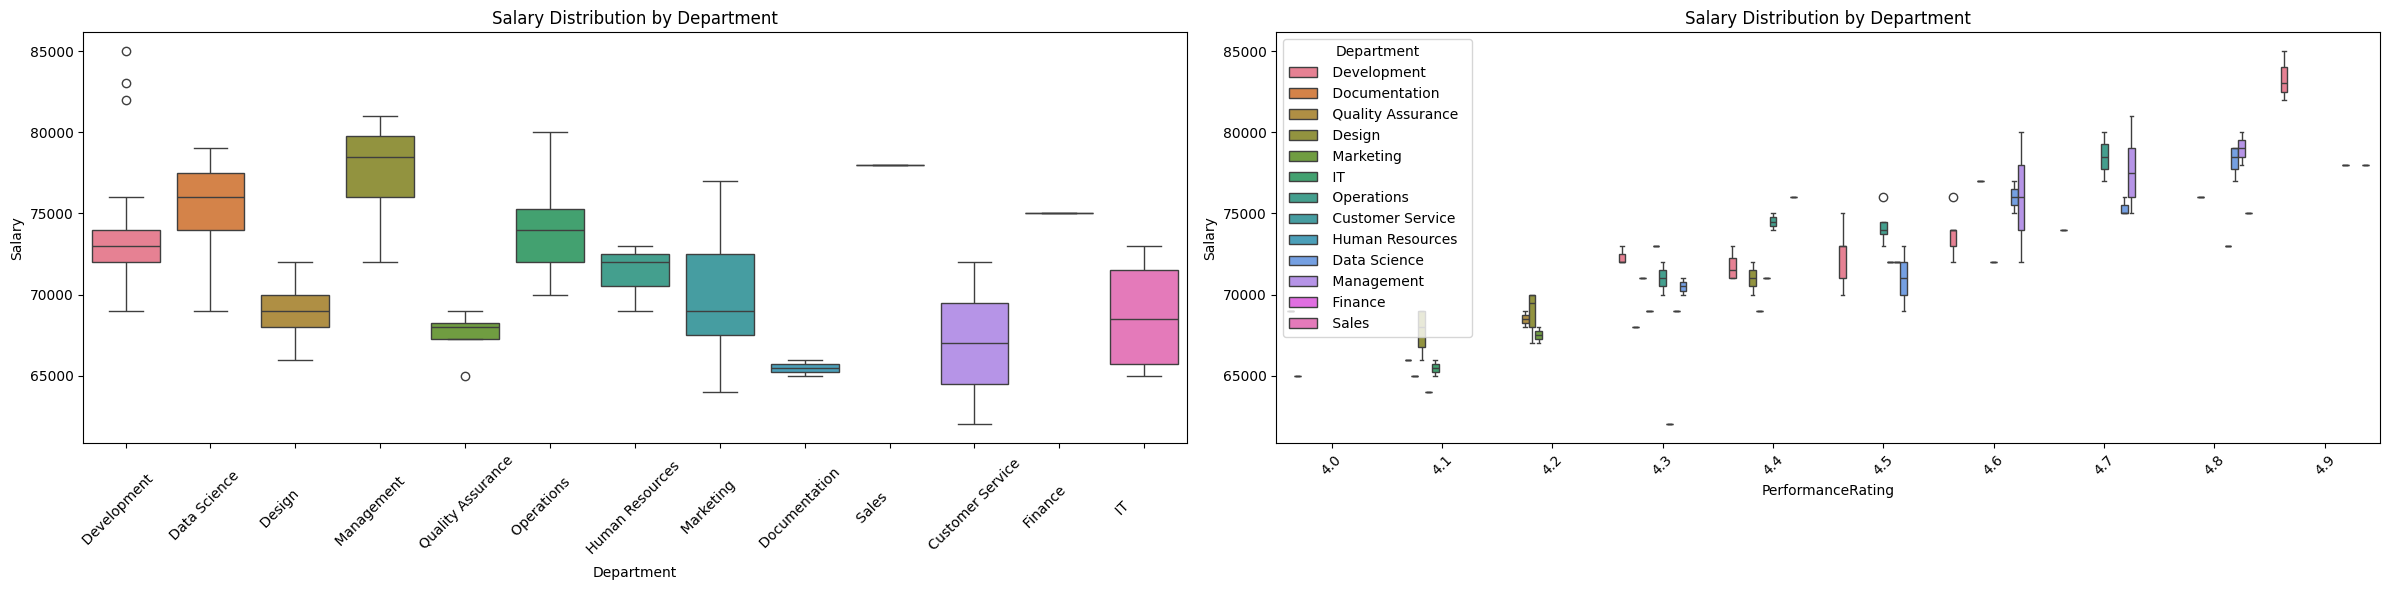

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))

# Plot 1
sns.boxplot(x='Department', y='Salary', data=df, hue='Department', ax=ax1)
ax1.set_title('Salary Distribution by Department')
ax1.tick_params(axis='x', rotation=45)

# Plot 2 ( identical to Plot 1, but you can modify it if needed)
sns.boxplot(x='PerformanceRating', y='Salary', data=df, hue='Department', ax=ax2)
ax2.set_title('Salary Distribution by Department')
ax2.tick_params(axis='x', rotation=45)

# Adjust the layout to fit the plot elements
plt.tight_layout()

# Display the plot
plt.show()